In [2]:
import json, os
import pandas as pd
import seaborn as sns
import matplotlib

In [2]:
files = os.listdir()
data = []
for file in files:
    if  'ifood-' in file:
        json_file = open(file)
        data = data + json.load(json_file)
len(data)

8711

In [3]:
df = pd.DataFrame.from_records(data)

In [4]:
df.head()

,id,name,resources,slug,userRating,priceRange,mainCategory,features,tags,paymentCodes,...,supportsAnyTracking,supportsOwnDelivery,supportsOrderScheduling,config,channels,hasPromo,deliveryFeeInfo,superRestaurant,description,headerUrl
0,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,"[{'type': 'LOGO', 'fileName': '201903251156_c8...",sao-paulo-sp/padaria-maraja-centro,4.74250,MODERATE,"{'code': 'PA1', 'name': 'Padaria'}","[DELIVERY, TAKEOUT, SCHEDULING, TRACKING, TRAC...","[ABR20_LANCHE, ABR20_PASCOA_ALMOCO, ACOMPANHE_...","[DNR, MPAY, MOVPAY_MC, MC, ELOD, AM, MCMA, MOV...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b37a365-d01d-464a-ad61-b1d7b5bb8057,Padaria União,"[{'type': 'LOGO', 'fileName': '4b37a365-d01d-4...",sao-paulo-sp/padaria-uniao-jardim-sao-saverio,4.73810,CHEAPEST,"{'code': 'PA1', 'name': 'Padaria'}","[DELIVERY, TAKEOUT, TRACKING, TRACEABLE, IMMED...",[NOVO],"[MPAY, ELOD]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72f28584-e76d-4ca4-a82f-6138d626560f,Splash Cafés e Bebidas Urbanas Paulista,"[{'type': 'LOGO', 'fileName': '72f28584-e76d-4...",sao-paulo-sp/splash-cafes-e-bebidas-urbanas-pa...,4.73422,CHEAPEST,"{'code': 'CA1', 'name': 'Cafeteria'}","[DELIVERY, TAKEOUT, SCHEDULING, TRACKING, TRAC...","[ACOMPANHE_PEDIDO_EM_ATIVACAO_AGO19, CAFE_DA_M...","[DNR, MPAY, MOVPAY_MC, MC, ELOD, AM, MCMA, MOV...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9d45db14-a741-44d9-84ff-c4af5aa17813,Pastel e Açaí da Simone,"[{'type': 'LOGO', 'fileName': '201902121722_9d...",sao-paulo-sp/pastel-e-acai-da-simone-mooca,4.73130,CHEAPEST,"{'code': 'PAS', 'name': 'Pastel'}","[DELIVERY, TAKEOUT, SCHEDULING, TRACKING, TRAC...","[ACOMPANHE_PEDIDO_EM_ATIVACAO_AGO19, CPGN_USER...","[DNR, MPAY, MOVPAY_MC, MC, ELOD, AM, MCMA, MOV...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4873d4af-f8d1-423c-a72a-99f5d39103f5,Nau Frutos do Mar,"[{'type': 'LOGO', 'fileName': '202004141622_48...",sao-paulo-sp/nau-frutos-do-mar-itaim-bibi,4.73118,MOST_EXPENSIVE,"{'code': 'FRU', 'name': 'Frutos Do Mar'}","[DELIVERY, TRACKING, TRACEABLE, IMMEDIATE_ORDER]","[CONTA_ESTRATEGICA, REST_ACABARAM_CHEGAR]","[DNR, MPAY, MOVPAY_MC, MC, ELOD, AM, MCMA, MOV...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8711 non-null   object 
 1   name                     8711 non-null   object 
 2   resources                8611 non-null   object 
 3   slug                     8611 non-null   object 
 4   userRating               8611 non-null   float64
 5   priceRange               8711 non-null   object 
 6   mainCategory             8611 non-null   object 
 7   features                 8611 non-null   object 
 8   tags                     8711 non-null   object 
 9   paymentCodes             8611 non-null   object 
 10  minimumOrderValue        8574 non-null   float64
 11  deliveryFee              8711 non-null   object 
 12  deliveryTime             8711 non-null   int64  
 13  distance                 8711 non-null   float64
 14  available               

## Is there a correlation between userRating and menu

In [13]:
attrs = [
    ('id', 'merchantId'),
    ('name', 'merchantName'),
    ('userRating', 'userRating'),
    ('mainCategory', 'mainCategory'),
    ('priceRange', 'priceRange'),
    ('features', 'features'),
    ('tags', 'tags'),
    ('merchantChain', 'merchantChain'),
    ('mainCuisineCode', 'mainCuisineCode'),
    ('evaluation', 'evaluation'),
    ('evaluationAverage', 'evaluationAverage'),
    ('avgPrice', 'avgPrice'),
    ('mainFoodType', 'mainFoodType'),
    ('superRestaurant', 'superRestaurant')
]

In [56]:
menus = []

for index, row in df.iterrows():
    menu = pd.DataFrame(row.menu)
    for attr in attrs:
        if type(row[attr[0]]) is dict or type(row[attr[0]]) is list:
            menu[attr[1]] = [row[attr[0]]] * menu.shape[0]
        else:
            menu[attr[1]] = row[attr[0]]
    menus.append(menu)

menuDf = pd.concat(menus, ignore_index=True)

In [57]:
menuDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63384 entries, 0 to 63383
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 63008 non-null  object 
 1   code               63384 non-null  object 
 2   name               63384 non-null  object 
 3   order              63384 non-null  float64
 4   availability       63008 non-null  object 
 5   enabled            63384 non-null  object 
 6   template           63015 non-null  object 
 7   itens              63384 non-null  object 
 8   merchantId         63384 non-null  object 
 9   merchantName       63384 non-null  object 
 10  userRating         63008 non-null  float64
 11  mainCategory       63008 non-null  object 
 12  priceRange         63384 non-null  object 
 13  features           63008 non-null  object 
 14  tags               63384 non-null  object 
 15  merchantChain      10590 non-null  object 
 16  mainCuisineCode    376

In [58]:
menuDf[['merchantId', 'merchantName', 'userRating', 'name', 'itens']].head()

,merchantId,merchantName,userRating,name,itens
0,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,Promoção sopa com vinho,[{'id': 'f0c0a6c3-3397-47bf-9069-3e414e897182'...
1,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,Promoção de cervejas - 600ml,[{'id': 'ce6568c5-ee92-4ff5-8c30-01932e66e039'...
2,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,Combinado de café da manhã,[{'id': 'f4a9e3a5-413c-4510-9880-95ff468122ab'...
3,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,Promoção marajá - 15% a 20% de desconto,[{'id': 'c9184461-08ba-4a93-8e4f-6f6c1660f33d'...
4,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,Ofertas para novos clientes,[{'id': '15588870-d30e-4dd3-bb50-7a45b15f1fb0'...


In [59]:
itensData = []

for index, row in menuDf.iterrows():
    itens = pd.DataFrame(row.itens)
    itens['menuId'] = row['id']
    itens['menuCode'] = row['code']
    itens['menuName'] = row['name']
    for attr in attrs:
        if type(row[attr[1]]) is dict or type(row[attr[1]]) is list:
            itens[attr[1]] = [row[attr[1]]] * itens.shape[0]
        else:
            itens[attr[1]] = row[attr[1]]
    itensData.append(itens)

menuItensDf = pd.concat(itensData, ignore_index=True)

In [60]:
menuItensDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632113 entries, 0 to 632112
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 632113 non-null  object 
 1   code               632113 non-null  object 
 2   description        632113 non-null  object 
 3   logoUrl            473871 non-null  object 
 4   details            622965 non-null  object 
 5   taxonomyName       372025 non-null  object 
 6   taxonomyScore      583936 non-null  float64
 7   needChoices        632113 non-null  object 
 8   unitPrice          632113 non-null  float64
 9   unitOriginalPrice  64571 non-null   float64
 10  order              632113 non-null  float64
 11  availability       632113 non-null  object 
 12  enabled            632113 non-null  object 
 13  openingHours       632113 non-null  object 
 14  tags               632113 non-null  object 
 15  operationModes     630787 non-null  object 
 16  ch

In [61]:
menuItensDf[['merchantId', 'merchantName', 'userRating', 'menuId', 'menuName', 'description']].head()

,merchantId,merchantName,userRating,menuId,menuName,description
0,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,5d3ae77d-3c30-4372-9aae-0303f27324dd,Promoção sopa com vinho,Monsaraz Alentejo Tinto - 750ml + Sopa para 2 ...
1,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,5d3ae77d-3c30-4372-9aae-0303f27324dd,Promoção sopa com vinho,Fran Nieto Senetiner Chardonnay - 750ml + Sopa...
2,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,5d3ae77d-3c30-4372-9aae-0303f27324dd,Promoção sopa com vinho,Antares Sauvignon Blanc - 750ml + Sopa para 2 ...
3,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,5d3ae77d-3c30-4372-9aae-0303f27324dd,Promoção sopa com vinho,Santa Carolina Reservado Rosé - 750ml + Sopa p...
4,c857b15e-7349-43c6-ad9b-d4b7f86ceb0d,Padaria Maraja,4.7425,0e690b0e-a4ac-4c32-a2ae-55fe737a3e8f,Promoção de cervejas - 600ml,SUPER PROMOÇÃO CERVEJAS - PEÇA 2 E GANHE 1 (60...


In [62]:
menuItensDf.shape

(632113, 37)

In [63]:
# save dataframe for futher analysis
df.to_json("./df.json")
menuDf.to_json("./menuDf.json")
menuItensDf.to_json("./menuItensDf.json")

In [42]:
menuItensDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632113 entries, 0 to 632112
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 632113 non-null  object 
 1   code               632113 non-null  object 
 2   description        632113 non-null  object 
 3   logoUrl            473871 non-null  object 
 4   details            622965 non-null  object 
 5   taxonomyName       372025 non-null  object 
 6   taxonomyScore      583936 non-null  float64
 7   needChoices        632113 non-null  bool   
 8   unitPrice          632113 non-null  float64
 9   unitOriginalPrice  64571 non-null   float64
 10  order              632113 non-null  int64  
 11  availability       632113 non-null  object 
 12  enabled            632113 non-null  bool   
 13  openingHours       632113 non-null  object 
 14  tags               632113 non-null  object 
 15  operationModes     630787 non-null  object 
 16  ch

# Restart from here

In [3]:
# restore dataframes
df = pd.read_json("./df.json")
menuDf = pd.read_json("./menuDf.json")
menuItensDf = pd.read_json("./menuItensDf.json")

## Analyzing price vs Score

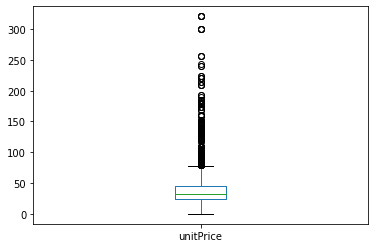

In [59]:
parmegiana = menuItensDf[menuItensDf['description'].str.contains('parmegiana')]
parmegiana.unitPrice.plot(kind='box')

In [60]:
Q3 = parmegiana.unitPrice.quantile(0.75)
parmegiana = parmegiana[parmegiana.unitPrice <= Q3]

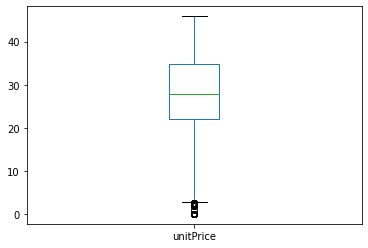

In [61]:
parmegiana.unitPrice.plot(kind='box')

In [62]:
Q0 = parmegiana.unitPrice.quantile(0.25)
parmegiana = parmegiana[parmegiana.unitPrice >= Q0]

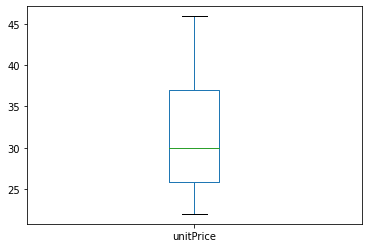

In [63]:
parmegiana.unitPrice.plot(kind='box')

In [64]:
stats = {}
stats['mean'] = parmegiana.unitPrice.mean()
stats['min'] = parmegiana.unitPrice.min()
stats['max'] = parmegiana.unitPrice.max()
stats

{'mean': 31.830686274509798, 'min': 22.0, 'max': 45.9}

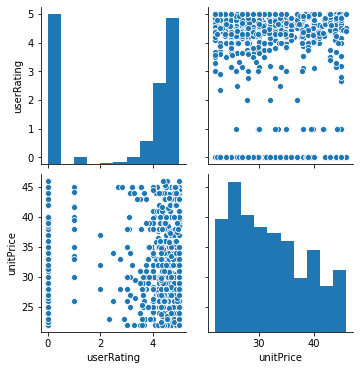

In [67]:
sns.pairplot(parmegiana[['userRating', 'unitPrice']])

Conclusion: It doesnt seem to exist any kind of correlation between user rating and price. Probably because rating has to do with the service itself and price would impact on number of sales but not necessarily you would get a low avaliation because of price since the customer already decided that he was ok with that price.

# Pricing

- https://medium.com/airbnb-engineering/learning-market-dynamics-for-optimal-pricing-97cffbcc53e3

## Hypothesis

- study categories in a certain region. Proportion of categories and display in a map. That helps understand what kind of options you are going against with
- price ranges for each category

If price is determined by offer and demand can I combine the data of number of places in a certain area offering a given meal as the offer vs an estimative of demand given the sales data I have from my customer?

Example: I now that in my area X places offer "parmegiana" and its one of the most ordered meals in my customer restaurant. Can I combine both to determine the deal price for it given that I know the price that those other places are offering?

Development: The simples pricing strategy seems to be to look at competition at let our customer decide what the price should be. We can get the data and compile it and display static information about the mean / min / max price on that particular meal. Also we can set and alarm of product that seems to be pricied too high.

- get data given customer location
- search similar products based on the name
- compile statistics about price on ifood market place and display somewhere
- check which product have a price too high or it's standouts in some way compared to competition and display on ifood dashboard